# Check `GDS` Python stack

This notebook checks all software requirements for the course Geographic Data Science are correctly installed. 

A successful run of the notebook implies no errors returned in any cell *and* every cell beyond the first one returning a printout of `True`. This ensures a correct environment installed.

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import bokeh

In [3]:
import colorama

In [4]:
import contextily

In [5]:
import cython

In [6]:
import dask

In [7]:
import dask_ml

ModuleNotFoundError: No module named 'dask_ml'

In [8]:
import datashader

ModuleNotFoundError: No module named 'datashader'

In [9]:
import dill

ModuleNotFoundError: No module named 'dill'

In [10]:
import geopandas

In [11]:
import geopy

In [12]:
import six
import joblib
import hdbscan

In [13]:
import ipyleaflet

In [14]:
import ipyparallel

In [15]:
import ipywidgets

In [16]:
import mplleaflet

ModuleNotFoundError: No module named 'mplleaflet'

In [17]:
import nbdime

In [18]:
import networkx

In [19]:
import osmnx

In [20]:
import palettable

In [21]:
import pandana

In [22]:
import polyline

In [23]:
import pymc3

ModuleNotFoundError: No module named 'pymc3'

In [24]:
import pysal

In [25]:
import pystan

ModuleNotFoundError: No module named 'pystan'

In [26]:
import qgrid

In [27]:
import rasterio

In [28]:
import rasterstats

In [29]:
import skimage

In [30]:
import sklearn

In [31]:
import seaborn

In [32]:
import statsmodels

In [33]:
import urbanaccess

ModuleNotFoundError: No module named 'urbanaccess'

In [34]:
import xlrd

In [35]:
import xlsxwriter

---

**Legacy checks** (in some ways superseded by those above but in some still useful)

In [36]:
import bokeh as bk
float(bk.__version__[:1]) >= 1

True

In [37]:
import matplotlib as mpl
float(mpl.__version__[:3]) >= 1.5

True

In [38]:
import mplleaflet as mpll

ModuleNotFoundError: No module named 'mplleaflet'

In [1]:
import seaborn as sns
float(sns.__version__[:3]) >= 0.6

False

In [39]:
import datashader as ds
float(ds.__version__[:3]) >= 0.6

ModuleNotFoundError: No module named 'datashader'

In [40]:
import palettable as pltt
float(pltt.__version__[:3]) >= 3.1

True

In [41]:
sns.palplot(pltt.matplotlib.Viridis_10.hex_colors)

NameError: name 'sns' is not defined

---

In [42]:
import pandas as pd
float(pd.__version__[:4]) >= 0.18

ValueError: could not convert string to float: '1.1.'

In [43]:
import dask
float(dask.__version__[:1]) >= 1

True

In [44]:
import sklearn
float(sklearn.__version__[:4]) >= 0.20

True

In [45]:
import statsmodels.api as sm
print(sm.__version__)
print(float(sm.__version__.split('.')[1]) >= 9)

0.12.0
True


In [46]:
import pymc3 as pm
print(pm.__version__)
print(float(pm.__version__[:3]) >= 3.6)

ModuleNotFoundError: No module named 'pymc3'

---

In [53]:
import fiona
float(fiona.__version__[:3]) >= 1.8

True

In [54]:
import geopandas as gpd
float(gpd.__version__[:3]) >= 0.4

True

In [55]:
import pysal as ps
float(ps.__version__[:1]) >= 2

True

In [56]:
import rasterio as rio
float(rio.__version__[:1]) >= 1

True

# Test

In [57]:
shp = pysal.lib.examples.get_path('columbus.shp')
db = geopandas.read_file(shp)
db.head()

AttributeError: module 'pysal' has no attribute 'lib'

In [58]:
db[['AREA', 'PERIMETER']].to_feather('db.feather')
tst = pd.read_feather('db.feather')
! rm db.feather

NameError: name 'db' is not defined

NameError: name 'db' is not defined

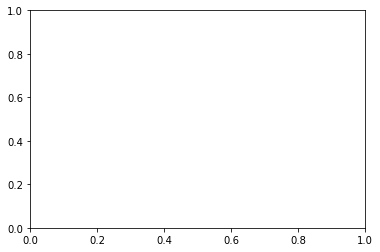

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(1)
db.plot(facecolor='yellow', ax=ax)
ax.set_axis_off()
plt.show()

In [50]:
db.crs['init'] = 'epsg:26918'

NameError: name 'db' is not defined

In [51]:
db_wgs84 = db.to_crs(epsg=4326)
db_wgs84.plot()
plt.show()

NameError: name 'db' is not defined

In [52]:
from pysal.viz.splot.mapping import vba_choropleth

f, ax = vba_choropleth(db['INC'], db['HOVAL'], db)

ModuleNotFoundError: No module named 'pysal.viz.splot'

In [ ]:
db.plot(column='INC', scheme='fisher_jenks', cmap=plt.matplotlib.cm.Blues)
plt.show()

In [ ]:
city = osmnx.gdf_from_place('Berkeley, California')
osmnx.plot_shape(osmnx.project_gdf(city));

In [ ]:
import numpy as np
import contextily as ctx
tl = ctx.providers.CartoDB.Positron

db = geopandas.read_file(ps.lib.examples.get_path('us48.shp'))
db.crs = {'init': 'epsg:4326'}
dbp = db.to_crs(epsg=3857)
w, s, e, n = dbp.total_bounds
# Download raster
_ = ctx.bounds2raster(w, s, e, n, 'us.tif', url=tl)
# Load up and plot
source = rio.open('us.tif', 'r')
red = source.read(1)
green = source.read(2)
blue = source.read(3)
pix = np.dstack((red, green, blue))
bounds = (source.bounds.left, source.bounds.right, \
          source.bounds.bottom, source.bounds.top)
f = plt.figure(figsize=(6, 6))
ax = plt.imshow(pix, extent=bounds)

! rm us.tif

In [ ]:
ax = db.plot()
ctx.add_basemap(ax, crs=db.crs)

In [ ]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, SplitMapControl

m = Map(center=(42.6824, 365.581), zoom=5)

right_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2017-11-11")
left_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisAquaBands721CR, "2017-11-11")

control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add_control(control)

m